In [56]:
import numpy as np
import pandas as pd

from os import listdir
from os.path import isfile, join

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
!pwd

/Users/terminator/Desktop/Trading/NSE Analysis


In [12]:
path_2021 = "Intraday 1 Min Data/Intraday 1 Min Data/2021/"

In [13]:
onlyfiles = [f for f in listdir(path_2021) if (isfile(join(path_2021, f)) & ("BNF" not in f))]
onlyfiles

['2021 JUNE NIFTY.txt',
 '2021 FEB NIFTY.txt',
 '2021 SEP NIFTY.txt',
 '2021 OCT NIFTY.txt',
 '2021 JAN NIFTY.txt',
 '2021 AUG NIFTY.txt',
 '2021 APR NIFTY.txt',
 '2021 JULY NIFTY.txt',
 '2021 MAR NIFTY.txt',
 '2021 MAY NIFTY.txt']

In [17]:
data_list = []
for files in onlyfiles:
    data = pd.read_csv(path_2021+files, sep=",", header=None)
    data_list.append(data)

In [45]:
nifty_2021 = pd.concat(data_list)

In [46]:
nifty_2021.head()

,0,1,2,3,4,5,6,7,8
0,NIFTY,20210601,09:08,15629.65,15629.65,15629.65,15629.65,0,0
1,NIFTY,20210601,09:16,15630.30,15630.30,15594.00,15614.20,0,0
2,NIFTY,20210601,09:17,15613.55,15618.20,15607.60,15607.60,0,0
3,NIFTY,20210601,09:18,15609.45,15611.10,15591.90,15599.85,0,0
4,NIFTY,20210601,09:19,15598.75,15610.05,15588.65,15607.05,0,0


In [47]:
nifty_2021.columns = ['Asset', 'Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Zero_1', 'Zero_2']
nifty_2021

,Asset,Date,Time,Open,High,Low,Close,Zero_1,Zero_2
0,NIFTY,20210601,09:08,15629.65,15629.65,15629.65,15629.65,0,0
1,NIFTY,20210601,09:16,15630.30,15630.30,15594.00,15614.20,0,0
2,NIFTY,20210601,09:17,15613.55,15618.20,15607.60,15607.60,0,0
3,NIFTY,20210601,09:18,15609.45,15611.10,15591.90,15599.85,0,0
4,NIFTY,20210601,09:19,15598.75,15610.05,15588.65,15607.05,0,0
...,...,...,...,...,...,...,...,...,...
7551,NIFTY,20210531,15:27,15586.65,15589.50,15585.05,15587.15,0,0
7552,NIFTY,20210531,15:28,15587.10,15587.65,15583.75,15583.90,0,0
7553,NIFTY,20210531,15:29,15584.15,15585.40,15577.20,15577.20,0,0
7554,NIFTY,20210531,15:30,15579.15,15580.20,15575.40,15576.00,0,0


In [50]:
nifty_2021["Instant"] = pd.to_datetime(nifty_2021.iloc[:, 1].astype('str')+' '+nifty_2021.iloc[:, 2].astype('str'))
nifty_2021 = nifty_2021.sort_values(by = 'Instant')

In [52]:
#nifty_2021.drop('Date', axis = 1, inplace = True)
nif50_2021 = nifty_2021[['Asset', 'Instant', 'Open', 'High', 'Low', 'Close']]

In [54]:
nif50_2021["Open_Lag_1min"] = nif50_2021["Open"] - nif50_2021["Open"].shift(periods=1)

/Users/terminator/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

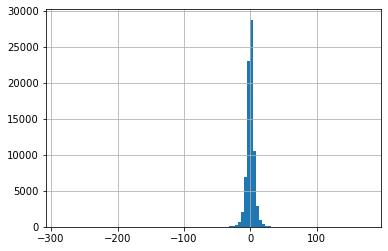

In [59]:
#nif50_2021["Open_Lag_1min"] = nif50_2021["Open_Lag_1min"].fillna(0)
nif50_2021["Open_Lag_1min"].hist(bins = 100)

In [34]:
import pandas as pd
df = pd.DataFrame({'time': [pd.to_datetime('2019-01-15 13:25:43')]})
df_unix_sec = pd.to_datetime(df['time']).astype(int)/(60*10**9)
df_unix_sec

0    2.579265e+07
Name: time, dtype: float64

In [60]:
nifty_2021_daily = nifty_2021.groupby('Date').agg({'Open': 'first', 'Close': 'last', 'High': 'max', 'Low': 'min', })

In [61]:
nifty_2021_daily

,Open,Close,High,Low
Date,,,,
20210101,13996.10,14018.50,14049.85,13991.35
20210104,14104.35,14132.90,14147.95,13953.75
20210105,14075.15,14199.50,14215.60,14048.15
20210106,14240.95,14146.25,14244.15,14039.90
20210107,14253.75,14137.35,14256.25,14123.10
...,...,...,...,...
20211025,18229.50,18125.40,18241.40,17968.50
20211026,18154.50,18268.40,18310.45,18099.30
20211027,18295.85,18210.95,18342.05,18167.90


<AxesSubplot:>

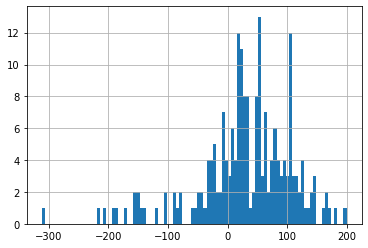

In [64]:
nifty_2021_daily_open_diff = nifty_2021_daily['Open'] - nifty_2021_daily['Close'].shift(1)
nifty_2021_daily_open_diff.hist(bins = 100)

In [67]:
nifty_2021_daily_open_diff[nifty_2021_daily_open_diff<-100]

Date
20210128   -157.10
20210226   -208.75
20210304   -218.85
20210305   -102.80
20210324   -102.30
20210412   -190.20
20210419   -311.25
20210430   -147.55
20210503   -150.05
20210511   -152.65
20210617   -119.25
20210621   -157.50
20210719   -168.90
20210820   -186.35
20210920   -141.30
dtype: float64